<a href="https://colab.research.google.com/github/zhutian12/Github-Practice/blob/master/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#https://drive.google.com/file/d/1WJozKuIy8vQz9YZOgbbXBWegcPcs-KOy/view?usp=sharing
file_id='1WJozKuIy8vQz9YZOgbbXBWegcPcs-KOy'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url = link.format(FILE_ID = file_id)
churn_df = pd.read_csv(csv_url)



In [ ]:
print(churn_df)

     State  Account length  ...  Customer service calls  Churn
0       KS             128  ...                       1  False
1       OH             107  ...                       1  False
2       NJ             137  ...                       0  False
3       OH              84  ...                       2  False
4       OK              75  ...                       3  False
...    ...             ...  ...                     ...    ...
2661    SC              79  ...                       2  False
2662    AZ             192  ...                       2  False
2663    WV              68  ...                       3  False
2664    RI              28  ...                       2  False
2665    TN              74  ...                       0  False

[2666 rows x 20 columns]


In [ ]:
#get target variable
y = churn_df['Churn']

In [ ]:
churn_df.describe
churn_df.dtypes
#check the proportion that Churn equal to True
print(y.sum()/y.shape[0]*100)
print(y.sum())
churn_df[churn_df.Churn == True].groupby('State').count()['Churn']

14.553638409602401
388


State
AK     3
AL     7
AR    11
AZ     3
CA     5
CO     7
CT    11
DC     5
DE     8
FL     7
GA     8
HI     2
IA     3
ID     5
IL     4
IN     6
KS    10
KY     6
LA     3
MA     8
MD    14
ME    11
MI    13
MN    13
MO     5
MS    11
MT    10
NC     9
ND     4
NE     4
NH     9
NJ    14
NM     4
NV    13
NY    12
OH    10
OK     7
OR     7
PA     8
RI     3
SC    11
SD     6
TN     5
TX    16
UT     8
VA     4
VT     6
WA    10
WI     4
WV     7
WY     8
Name: Churn, dtype: int64

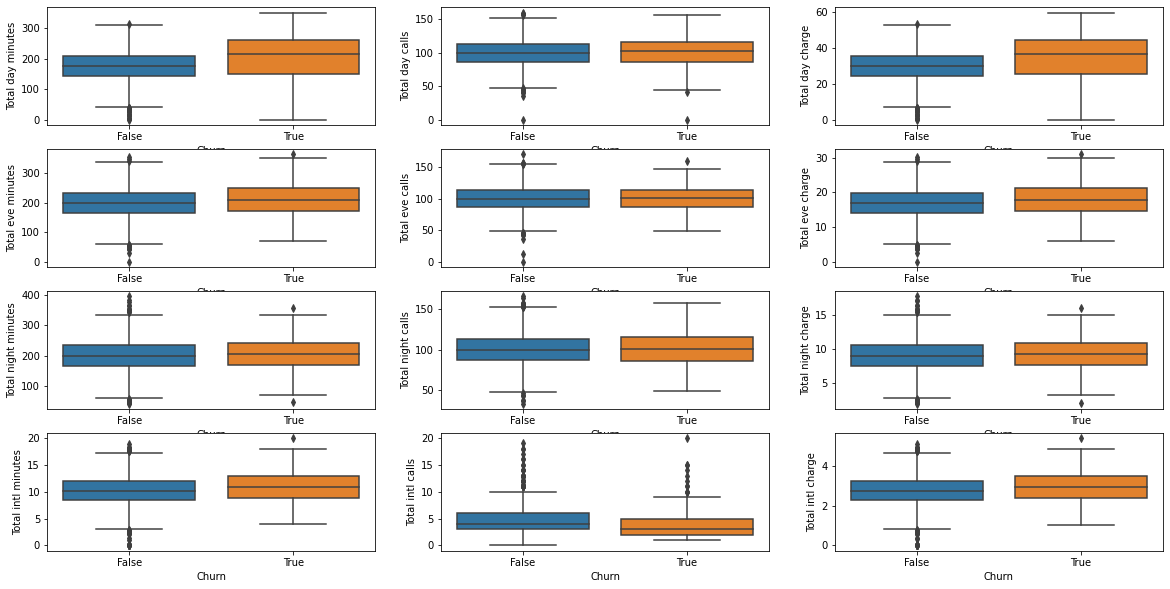

In [ ]:
_,axss = plt.subplots(4,3, figsize=[20,10])#People who answer True have higher "Total day/eve/night/intl mins" and "Total day/eve/night/intl charges"
sns.boxplot(x = 'Churn',y='Total day minutes',data = churn_df,ax=axss[0][0])
sns.boxplot(x = 'Churn',y='Total day calls',data = churn_df,ax=axss[0][1])
sns.boxplot(x = 'Churn',y='Total day charge',data = churn_df,ax=axss[0][2])
sns.boxplot(x = 'Churn',y='Total eve minutes',data = churn_df,ax=axss[1][0])
sns.boxplot(x = 'Churn',y='Total eve calls',data = churn_df,ax=axss[1][1])
sns.boxplot(x = 'Churn',y='Total eve charge',data = churn_df,ax=axss[1][2])
sns.boxplot(x = 'Churn',y='Total night minutes',data = churn_df,ax=axss[2][0])
sns.boxplot(x = 'Churn',y='Total night calls',data = churn_df,ax=axss[2][1])
sns.boxplot(x = 'Churn',y='Total night charge',data = churn_df,ax=axss[2][2])
sns.boxplot(x = 'Churn',y='Total intl minutes',data = churn_df,ax=axss[3][0])
sns.boxplot(x = 'Churn',y='Total intl calls',data = churn_df,ax=axss[3][1])
sns.boxplot(x = 'Churn',y='Total intl charge',data = churn_df,ax=axss[3][2])

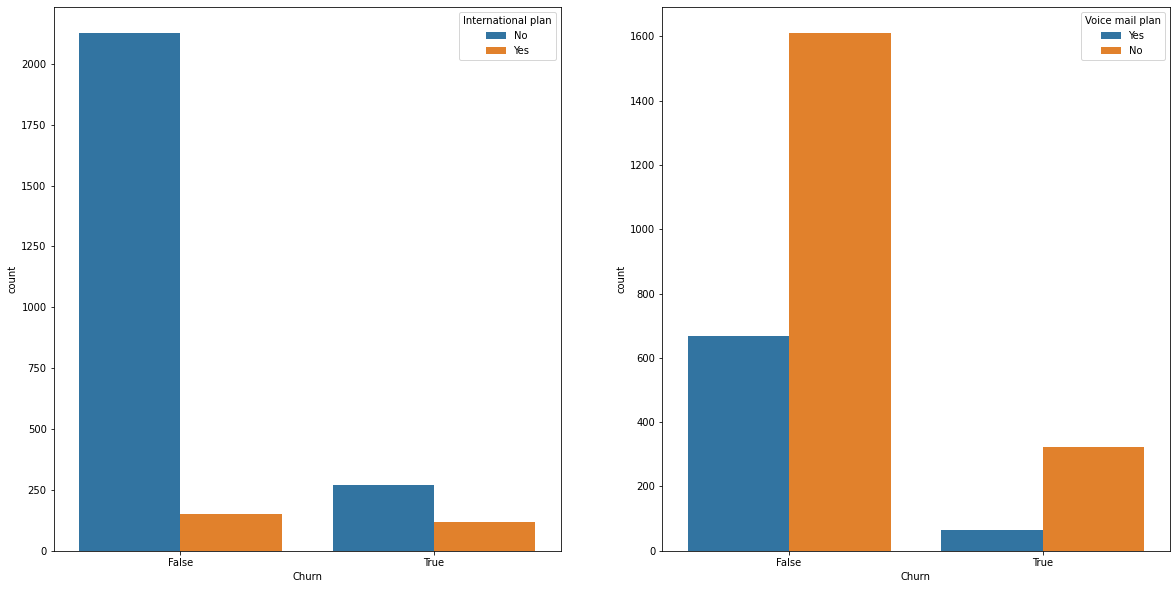

In [ ]:
#understand categorical graph: State, International plan, Voice mail plan
_,axss = plt.subplots(1,2,figsize = [20,10])
#sns.countplot(x = 'Churn',hue='State',data = churn_df,ax=axss[0][0])
sns.countplot(x='Churn',hue='International plan',data = churn_df,ax=axss[0])
sns.countplot(x = 'Churn',hue='Voice mail plan',data = churn_df, ax=axss[1])

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
Total day minutes,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934
Total day calls,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133
Total day charge,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938
Total eve minutes,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947
Total eve calls,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000
Total eve charge,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955
Total night minutes,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510
Total night calls,0.015054,-0.016776,0.015057,0.009017,0.000797,0.009030,0.012736,1.000000,0.012720,-0.023447,0.019367,-0.023434
Total night charge,0.013464,0.008972,0.013468,-0.013450,-0.000135,-0.013464,0.999999,0.012720,1.000000,-0.008615,-0.001099,-0.008517
Total intl minutes,-0.011042,0.031036,-0.011046,-0.006915,0.011012,-0.006923,-0.008607,-0.023447,-0.008615,1.000000,0.037315,0.999993


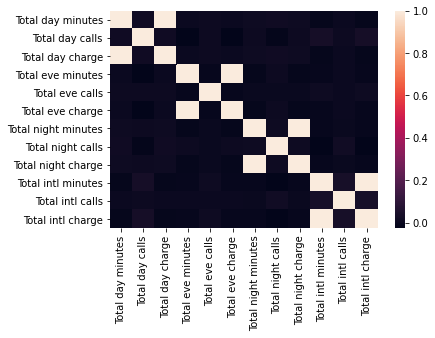

In [ ]:
#Correlation between each variable
corr_score=churn_df.loc[:,'Total day minutes':'Total intl charge'].corr()
sns.heatmap(corr_score)
corr_score#we find minutes variable has a perfect positive correlation with charges variable


In [ ]:
#Feature reprocess
churn_df['International plan'] = churn_df['International plan'] == "Yes"
churn_df['Voice mail plan'] = churn_df['Voice mail plan'] == "Yes"


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
